In [3]:
import pandas as pd
import numpy as np
import csv as csv
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
from scipy.stats.mstats import mode

from scipy.stats.mstats import mean
import pylab
import seaborn as sb
from sklearn.ensemble import RandomForestClassifier

footballers_df=pd.read_csv('CrowdstormingDataJuly1st.csv',header=0)
#let's figure out how's the table values
footballers_df.ix[:10,:13]

,playerShort,player,club,leagueCountry,birthday,height,weight,position,games,victories,ties,defeats,goals
0,lucas-wilchez,Lucas Wilchez,Real Zaragoza,Spain,31.08.1983,177.0,72.0,Attacking Midfielder,1,0,0,1,0
1,john-utaka,John Utaka,Montpellier HSC,France,08.01.1982,179.0,82.0,Right Winger,1,0,0,1,0
2,abdon-prats,Abdón Prats,RCD Mallorca,Spain,17.12.1992,181.0,79.0,NaN,1,0,1,0,0
3,pablo-mari,Pablo Marí,RCD Mallorca,Spain,31.08.1993,191.0,87.0,Center Back,1,1,0,0,0
4,ruben-pena,Rubén Peña,Real Valladolid,Spain,18.07.1991,172.0,70.0,Right Midfielder,1,1,0,0,0
5,aaron-hughes,Aaron Hughes,Fulham FC,England,08.11.1979,182.0,71.0,Center Back,1,0,0,1,0
6,aleksandar-kolarov,Aleksandar Kolarov,Manchester City,England,10.11.1985,187.0,80.0,Left Fullback,1,1,0,0,0
7,alexander-tettey,Alexander Tettey,Norwich City,England,04.04.1986,180.0,68.0,Defensive Midfielder,1,0,0,1,0
8,anders-lindegaard,Anders Lindegaard,Manchester United,England,13.04.1984,193.0,80.0,Goalkeeper,1,0,1,0,0
9,andreas-beck,Andreas Beck,1899 Hoffenheim,Germany,13.03.1987,180.0,70.0,Right Fullback,1,1,0,0,0


In [4]:
footballers_df.ix[:10,13:28]

,yellowCards,yellowReds,redCards,photoID,rater1,rater2,refNum,refCountry,Alpha_3,meanIAT,nIAT,seIAT,meanExp,nExp,seExp
0,0,0,0,95212.jpg,0.25,0.50,1,1,GRC,0.326391,712.0,0.000564,0.396000,750.0,0.002696
1,1,0,0,1663.jpg,0.75,0.75,2,2,ZMB,0.203375,40.0,0.010875,-0.204082,49.0,0.061504
2,1,0,0,NaN,NaN,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002
3,0,0,0,NaN,NaN,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002
4,0,0,0,NaN,NaN,NaN,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002
5,0,0,0,3868.jpg,0.25,0.00,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752
6,0,0,0,47704.jpg,0.00,0.25,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752
7,0,0,0,22356.jpg,1.00,1.00,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752
8,0,0,0,16528.jpg,0.25,0.25,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752
9,0,0,0,36499.jpg,0.00,0.00,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752


In [5]:
footballers_df.describe()
# as we can see there's null values because count values doesn't match (146028) and some missing columns

/home/alvaro/anaconda3/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,height,weight,games,victories,ties,defeats,goals,yellowCards,yellowReds,redCards,rater1,rater2,refNum,refCountry,meanIAT,nIAT,seIAT,meanExp,nExp,seExp
count,145765.000000,143785.000000,146028.000000,146028.000000,146028.000000,146028.000000,146028.000000,146028.000000,146028.000000,146028.000000,124621.000000,124621.000000,146028.000000,146028.000000,145865.000000,1.458650e+05,1.458650e+05,145865.000000,1.458650e+05,145865.000000
mean,181.935938,76.075662,2.921166,1.278344,0.708241,0.934581,0.338058,0.385364,0.011381,0.012559,0.264255,0.302862,1534.827444,29.642842,0.346276,1.969741e+04,6.310849e-04,0.452026,2.044023e+04,0.002994
std,6.738726,7.140906,3.413633,1.790725,1.116793,1.383059,0.906481,0.795333,0.107931,0.112889,0.295382,0.293020,918.736625,27.496189,0.032246,1.271262e+05,4.735857e-03,0.217469,1.306157e+05,0.019723
min,161.000000,54.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,-0.047254,2.000000e+00,2.235373e-07,-1.375000,2.000000e+00,0.000001
25%,NaN,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,641.000000,7.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,1604.000000,21.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,3.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,NaN,NaN,2345.000000,44.000000,NaN,NaN,NaN,NaN,NaN,NaN
max,203.000000,100.000000,47.000000,29.000000,14.000000,18.000000,23.000000,14.000000,3.000000,2.000000,1.000000,1.000000,3147.000000,161.000000,0.573793,1.975803e+06,2.862871e-01,1.800000,2.029548e+06,1.060660


In [6]:
#let's print again all the columns
print('\t\t\t>>>  all columns  <<<\n',footballers_df.columns.values)
# let's fetch all the numeric variables
numeric_variables=list(footballers_df.dtypes[footballers_df.dtypes!='object'].index)
print('\t\t\t>>>  numeric columns  <<<\n',numeric_variables)

			>>>  all columns  <<<
 ['playerShort' 'player' 'club' 'leagueCountry' 'birthday' 'height' 'weight'
 'position' 'games' 'victories' 'ties' 'defeats' 'goals' 'yellowCards'
 'yellowReds' 'redCards' 'photoID' 'rater1' 'rater2' 'refNum' 'refCountry'
 'Alpha_3' 'meanIAT' 'nIAT' 'seIAT' 'meanExp' 'nExp' 'seExp']
			>>>  numeric columns  <<<
 ['height', 'weight', 'games', 'victories', 'ties', 'defeats', 'goals', 'yellowCards', 'yellowReds', 'redCards', 'rater1', 'rater2', 'refNum', 'refCountry', 'meanIAT', 'nIAT', 'seIAT', 'meanExp', 'nExp', 'seExp']


In [7]:
for i in footballers_df.columns:
    if(i in numeric_variables):
        # dejamos el valor medio para no alterar los resultados
        footballers_df[i].fillna(footballers_df[i].mean(),inplace=True)
    else:
        # pasamos a str para respetar el type de position
        footballers_df[i].fillna('Unknown',inplace=True)
footballers_df.describe()

,height,weight,games,victories,ties,defeats,goals,yellowCards,yellowReds,redCards,rater1,rater2,refNum,refCountry,meanIAT,nIAT,seIAT,meanExp,nExp,seExp
count,146028.000000,146028.000000,146028.000000,146028.000000,146028.000000,146028.000000,146028.000000,146028.000000,146028.000000,146028.000000,146028.000000,146028.000000,146028.000000,146028.000000,146028.000000,1.460280e+05,1.460280e+05,146028.000000,1.460280e+05,146028.000000
mean,181.935938,76.075662,2.921166,1.278344,0.708241,0.934581,0.338058,0.385364,0.011381,0.012559,0.264255,0.302862,1534.827444,29.642842,0.346276,1.969741e+04,6.310849e-04,0.452026,2.044023e+04,0.002994
std,6.732655,7.085851,3.413633,1.790725,1.116793,1.383059,0.906481,0.795333,0.107931,0.112889,0.272874,0.270691,918.736625,27.496189,0.032228,1.270552e+05,4.733213e-03,0.217347,1.305428e+05,0.019712
min,161.000000,54.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,-0.047254,2.000000e+00,2.235373e-07,-1.375000,2.000000e+00,0.000001
25%,177.000000,71.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,641.000000,7.000000,0.334684,1.785000e+03,5.454025e-05,0.336101,1.897000e+03,0.000225
50%,182.000000,76.000000,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.250000,1604.000000,21.000000,0.336628,2.882000e+03,1.508847e-04,0.356446,3.011000e+03,0.000586
75%,187.000000,81.000000,3.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.264255,0.302862,2345.000000,44.000000,0.369894,7.749000e+03,2.294896e-04,0.588297,7.974000e+03,0.001002
max,203.000000,100.000000,47.000000,29.000000,14.000000,18.000000,23.000000,14.000000,3.000000,2.000000,1.000000,1.000000,3147.000000,161.000000,0.573793,1.975803e+06,2.862871e-01,1.800000,2.029548e+06,1.060660


In [8]:
footballers_df.ix[:10,:13]

,playerShort,player,club,leagueCountry,birthday,height,weight,position,games,victories,ties,defeats,goals
0,lucas-wilchez,Lucas Wilchez,Real Zaragoza,Spain,31.08.1983,177.0,72.0,Attacking Midfielder,1,0,0,1,0
1,john-utaka,John Utaka,Montpellier HSC,France,08.01.1982,179.0,82.0,Right Winger,1,0,0,1,0
2,abdon-prats,Abdón Prats,RCD Mallorca,Spain,17.12.1992,181.0,79.0,Unknown,1,0,1,0,0
3,pablo-mari,Pablo Marí,RCD Mallorca,Spain,31.08.1993,191.0,87.0,Center Back,1,1,0,0,0
4,ruben-pena,Rubén Peña,Real Valladolid,Spain,18.07.1991,172.0,70.0,Right Midfielder,1,1,0,0,0
5,aaron-hughes,Aaron Hughes,Fulham FC,England,08.11.1979,182.0,71.0,Center Back,1,0,0,1,0
6,aleksandar-kolarov,Aleksandar Kolarov,Manchester City,England,10.11.1985,187.0,80.0,Left Fullback,1,1,0,0,0
7,alexander-tettey,Alexander Tettey,Norwich City,England,04.04.1986,180.0,68.0,Defensive Midfielder,1,0,0,1,0
8,anders-lindegaard,Anders Lindegaard,Manchester United,England,13.04.1984,193.0,80.0,Goalkeeper,1,0,1,0,0
9,andreas-beck,Andreas Beck,1899 Hoffenheim,Germany,13.03.1987,180.0,70.0,Right Fullback,1,1,0,0,0


In [9]:
footballers_df.ix[:10,13:28]

,yellowCards,yellowReds,redCards,photoID,rater1,rater2,refNum,refCountry,Alpha_3,meanIAT,nIAT,seIAT,meanExp,nExp,seExp
0,0,0,0,95212.jpg,0.250000,0.500000,1,1,GRC,0.326391,712.0,0.000564,0.396000,750.0,0.002696
1,1,0,0,1663.jpg,0.750000,0.750000,2,2,ZMB,0.203375,40.0,0.010875,-0.204082,49.0,0.061504
2,1,0,0,Unknown,0.264255,0.302862,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002
3,0,0,0,Unknown,0.264255,0.302862,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002
4,0,0,0,Unknown,0.264255,0.302862,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002
5,0,0,0,3868.jpg,0.250000,0.000000,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752
6,0,0,0,47704.jpg,0.000000,0.250000,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752
7,0,0,0,22356.jpg,1.000000,1.000000,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752
8,0,0,0,16528.jpg,0.250000,0.250000,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752
9,0,0,0,36499.jpg,0.000000,0.000000,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752


In [10]:
# let's parse the leagueCountry, birthday and club to numbers, so we can fetch mode later
d = {'Spain':'1', 'England':'2', 'France':'3', 'Germany':'4'}
footballers_df['leagueCountry']=footballers_df['leagueCountry'].apply(lambda x:d[x])
footballers_df['birthday']=footballers_df['birthday'].apply(lambda x: 1+2012-int(x[6:]) if(int(x[3:4])<7) else 2012-int(x[6:]))
team={v:k for k,v in enumerate(footballers_df.club.unique())}

footballers_df['club']=footballers_df['club'].apply(lambda x: int(team[x]))

In [11]:
#footballers_df[footballers_df.columns[:13]][:10]
footballers_df.ix[:10,:13]

,playerShort,player,club,leagueCountry,birthday,height,weight,position,games,victories,ties,defeats,goals
0,lucas-wilchez,Lucas Wilchez,0,1,30,177.0,72.0,Attacking Midfielder,1,0,0,1,0
1,john-utaka,John Utaka,1,3,31,179.0,82.0,Right Winger,1,0,0,1,0
2,abdon-prats,Abdón Prats,2,1,21,181.0,79.0,Unknown,1,0,1,0,0
3,pablo-mari,Pablo Marí,2,1,20,191.0,87.0,Center Back,1,1,0,0,0
4,ruben-pena,Rubén Peña,3,1,22,172.0,70.0,Right Midfielder,1,1,0,0,0
5,aaron-hughes,Aaron Hughes,4,2,34,182.0,71.0,Center Back,1,0,0,1,0
6,aleksandar-kolarov,Aleksandar Kolarov,5,2,28,187.0,80.0,Left Fullback,1,1,0,0,0
7,alexander-tettey,Alexander Tettey,6,2,27,180.0,68.0,Defensive Midfielder,1,0,0,1,0
8,anders-lindegaard,Anders Lindegaard,7,2,29,193.0,80.0,Goalkeeper,1,0,1,0,0
9,andreas-beck,Andreas Beck,8,4,26,180.0,70.0,Right Fullback,1,1,0,0,0


In [12]:
# footballers_df[footballers_df.columns[13:28]][:10]
footballers_df.ix[:10,13:28]

,yellowCards,yellowReds,redCards,photoID,rater1,rater2,refNum,refCountry,Alpha_3,meanIAT,nIAT,seIAT,meanExp,nExp,seExp
0,0,0,0,95212.jpg,0.250000,0.500000,1,1,GRC,0.326391,712.0,0.000564,0.396000,750.0,0.002696
1,1,0,0,1663.jpg,0.750000,0.750000,2,2,ZMB,0.203375,40.0,0.010875,-0.204082,49.0,0.061504
2,1,0,0,Unknown,0.264255,0.302862,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002
3,0,0,0,Unknown,0.264255,0.302862,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002
4,0,0,0,Unknown,0.264255,0.302862,3,3,ESP,0.369894,1785.0,0.000229,0.588297,1897.0,0.001002
5,0,0,0,3868.jpg,0.250000,0.000000,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752
6,0,0,0,47704.jpg,0.000000,0.250000,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752
7,0,0,0,22356.jpg,1.000000,1.000000,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752
8,0,0,0,16528.jpg,0.250000,0.250000,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752
9,0,0,0,36499.jpg,0.000000,0.000000,4,4,LUX,0.325185,127.0,0.003297,0.538462,130.0,0.013752


/home/alvaro/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/alvaro/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


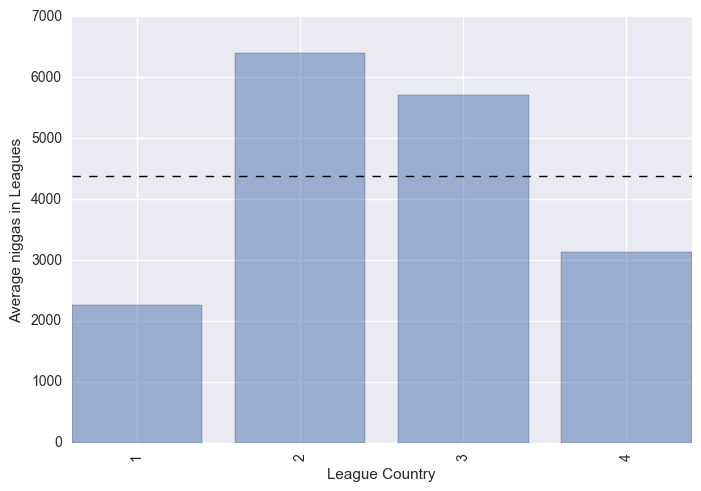

Niggas:  playerShort  moda 0    djibril-cisse
dtype: object
White:  playerShort  moda 0    john-arne-riise
dtype: object
Niggas:  player  moda 0    Djibril Cissé
dtype: object
White:  player  moda 0    John Arne Riise
dtype: object
Niggas:  club  moda 0    38
dtype: int64
White:  club  moda 0    65
dtype: int64
Niggas:  leagueCountry  moda 0    2
dtype: object
White:  leagueCountry  moda 0    4
dtype: object
Niggas:  birthday  moda 0    27
dtype: int64
White:  birthday  moda 0    28
dtype: int64
Niggas:  height  medio 181.69790139038346
White:  height  medio 182.33102941379155
Niggas:  weight  medio 76.31096024846357
White:  weight  medio 76.47535584641774
Niggas:  position  moda 0    Center Forward
dtype: object
White:  position  moda 0    Center Back
dtype: object
Niggas:  games  medio 2.9088622069754146
White:  games  medio 3.0450462468872286
Niggas:  victories  medio 1.2748999428244712
White:  victories  medio 1.3723319103521878
Niggas:  ties  medio 0.7185820468839337
White:  ties 

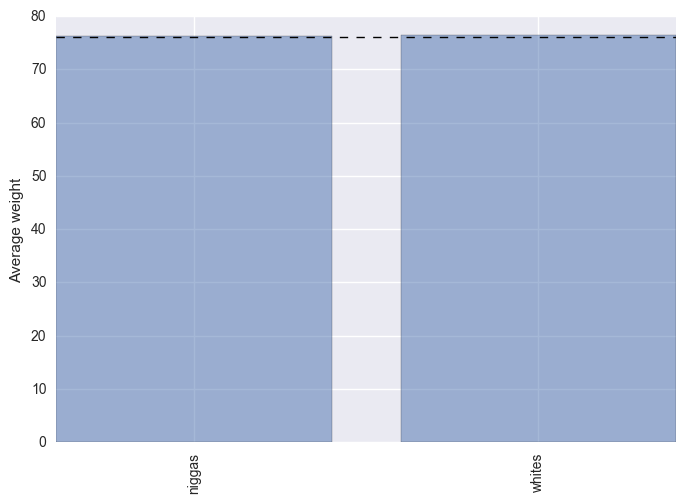

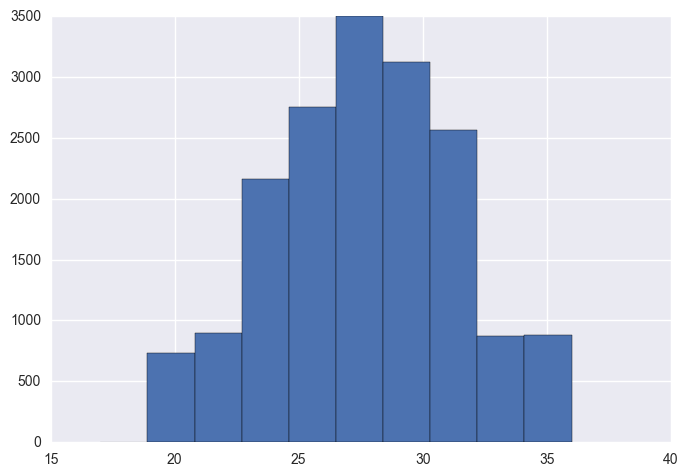

In [13]:
nonblacks=footballers_df[(footballers_df.rater1 <0.26) & (footballers_df.rater2 <0.26)]
allblacks=footballers_df[(footballers_df.rater1 >0.74) & (footballers_df.rater2 >0.74)]
number_of_niggas=allblacks.groupby('leagueCountry').count()['player']
allblacks['niggas']=allblacks['leagueCountry']
#number_of_niggas
#value of niggas->allblacks.values[0][len(allblacks.values[0])-1]
allblacks['niggas']=allblacks['niggas'].apply(lambda x: number_of_niggas[x])

#allblacks.plot( x='leagueCountry', y='niggas', kind='hist')
#hist(plt(sorted(allblacks.leagueCountry.unique()), weights=sorted(allblacks.niggas.unique())))
#plot way1
sortedLeague=sorted(allblacks.leagueCountry.unique())
sortedNiggas=[]
for i in range(0,4):
     sortedNiggas.append(number_of_niggas[i])
pylab.figure(1)
x = range(0,4)
pylab.xticks(x, sortedLeague, rotation='vertical')
pylab.ylabel("Average niggas in Leagues")
pylab.xlabel("League Country")
pylab.bar(x, sortedNiggas, align='center', alpha=0.5)
pylab.axhline(number_of_niggas.sum()/4, color='k', linewidth=1, linestyle='dashed')
pylab.show()
#plot way2
# niggasoverleague = pd.crosstab(index=allblacks["leagueCountry"], columns="niggas")
# niggasoverleague.plot(kind="bar",figsize=(4,4))
#niggasoverredcards = pd.crosstab(index=allblacks["leagueCountry"], columns="redCards")
#niggasoverredcards.plot(kind="bar",figsize=(4,4))
#peso medio de niggas, problema? algunos footballers tienen peso NaN
avgpesonigga=allblacks['weight'].sum()/len(allblacks)
avgpesowhite=nonblacks['weight'].sum()/len(nonblacks)
avgpeso=footballers_df['weight'].sum()/len(footballers_df)
# imprimimos los posibles indicadores entre blancos y negros
for i in allblacks.columns:
#     omitimos valores string como playerShort, player, etc.. y la columna niggas que solo esta en allblacks
    if(i in numeric_variables):
        print('Niggas: ',i,' medio',allblacks[i].sum()/len(allblacks))
        print('White: ',str(i),' medio',nonblacks[i].sum()/len(nonblacks))
    elif(i!='niggas'):
        maximo=max(,)
        minimo=min(,)
        1-min/max=0.01
        print('Niggas: ',i,' moda',allblacks[i].mode())
        print('White: ',str(i),' moda',nonblacks[i].mode())
        

#allblacks
nonblacks

pairs = [(avgpesonigga, 'niggas'),(avgpesowhite, 'whites')]
pairs.sort()
sortedMeans, sortedTitle = zip(*pairs)

pylab.figure(1)
x = range(0,2)
pylab.xticks(x, sortedTitle, rotation='vertical')
pylab.ylabel("Average weight")
pylab.bar(x, sortedMeans, align='center', alpha=0.5)
pylab.axhline(avgpeso, color='k', linewidth=1, linestyle='dashed')
pylab.show()
exclude = ['playerShort', 'player', 'club', 'leagueCountry', 'height',
       'weight', 'position', 'games', 'victories', 'ties', 'defeats', 'goals',
       'yellowCards', 'yellowReds', 'redCards', 'photoID', 'rater1', 'rater2',
       'refNum', 'refCountry', 'Alpha_3', 'meanIAT', 'nIAT', 'seIAT',
       'meanExp', 'nExp', 'seExp', 'niggas']
#exclude = ['playerShort', 'player','rater1','rater2','niggas','club']
#allblacks.ix[:, allblacks.columns.difference(exclude)].hist() 
allblacks.columns
allblacks.birthday.hist()
#allblacks.ix[:,'birthday'].hist()

In [14]:
exclude = ['playerShort', 'player','rater1','rater2']
exclude=['birthday','club','defeats','games','goals','height','leagueCountry']
#allblacks.ix[:, allblacks.columns.difference(exclude)].hist() 
footballers_df.ix[:, footballers_df.columns.difference(exclude)].describe() 

#footballers_df.head()

,meanExp,meanIAT,nExp,nIAT,rater1,rater2,redCards,refCountry,refNum,seExp,seIAT,ties,victories,weight,yellowCards,yellowReds
count,146028.000000,146028.000000,1.460280e+05,1.460280e+05,146028.000000,146028.000000,146028.000000,146028.000000,146028.000000,146028.000000,1.460280e+05,146028.000000,146028.000000,146028.000000,146028.000000,146028.000000
mean,0.452026,0.346276,2.044023e+04,1.969741e+04,0.264255,0.302862,0.012559,29.642842,1534.827444,0.002994,6.310849e-04,0.708241,1.278344,76.075662,0.385364,0.011381
std,0.217347,0.032228,1.305428e+05,1.270552e+05,0.272874,0.270691,0.112889,27.496189,918.736625,0.019712,4.733213e-03,1.116793,1.790725,7.085851,0.795333,0.107931
min,-1.375000,-0.047254,2.000000e+00,2.000000e+00,0.000000,0.000000,0.000000,1.000000,1.000000,0.000001,2.235373e-07,0.000000,0.000000,54.000000,0.000000,0.000000
25%,0.336101,0.334684,1.897000e+03,1.785000e+03,0.000000,0.250000,0.000000,7.000000,641.000000,0.000225,5.454025e-05,0.000000,0.000000,71.000000,0.000000,0.000000
50%,0.356446,0.336628,3.011000e+03,2.882000e+03,0.250000,0.250000,0.000000,21.000000,1604.000000,0.000586,1.508847e-04,0.000000,1.000000,76.000000,0.000000,0.000000
75%,0.588297,0.369894,7.974000e+03,7.749000e+03,0.264255,0.302862,0.000000,44.000000,2345.000000,0.001002,2.294896e-04,1.000000,2.000000,81.000000,1.000000,0.000000
max,1.800000,0.573793,2.029548e+06,1.975803e+06,1.000000,1.000000,2.000000,161.000000,3147.000000,1.060660,2.862871e-01,14.000000,29.000000,100.000000,14.000000,3.000000


In [15]:
#let's print again all the columns
print('\t\t\t>>>  all columns  <<<\n',allblacks.columns.values)
# let's fetch all the numeric variables
numeric_variables_black=list(allblacks.dtypes[allblacks.dtypes!='object'].index)
print('\t\t\t>>>  numeric columns  <<<\n',numeric_variables_black)

			>>>  all columns  <<<
 ['playerShort' 'player' 'club' 'leagueCountry' 'birthday' 'height' 'weight'
 'position' 'games' 'victories' 'ties' 'defeats' 'goals' 'yellowCards'
 'yellowReds' 'redCards' 'photoID' 'rater1' 'rater2' 'refNum' 'refCountry'
 'Alpha_3' 'meanIAT' 'nIAT' 'seIAT' 'meanExp' 'nExp' 'seExp' 'niggas']
			>>>  numeric columns  <<<
 ['club', 'birthday', 'height', 'weight', 'games', 'victories', 'ties', 'defeats', 'goals', 'yellowCards', 'yellowReds', 'redCards', 'rater1', 'rater2', 'refNum', 'refCountry', 'meanIAT', 'nIAT', 'seIAT', 'meanExp', 'nExp', 'seExp', 'niggas']


# Disaggregating the data into single player-ref interactions
We tried to see any indicator which allow us to differentiate between blacks and whites, but we couldn't. So as Crowdstorming_visualisation.ipynb suggests:
We already see some strange things in the data. Some refs officiated very few games. The two raters disagree about player skintone quite often. For some players there isn't a photo, so their skin tone couldn't be rated. Most dyads don't feature cards at all. In general, it's difficult to get an intuition for what the population looks like from inspecting small samples of the data. This is particularly difficult in the dyad format, as each player or ref's cards are spread un-evenly across the dataset.

highest number of games in a single dyad =  47


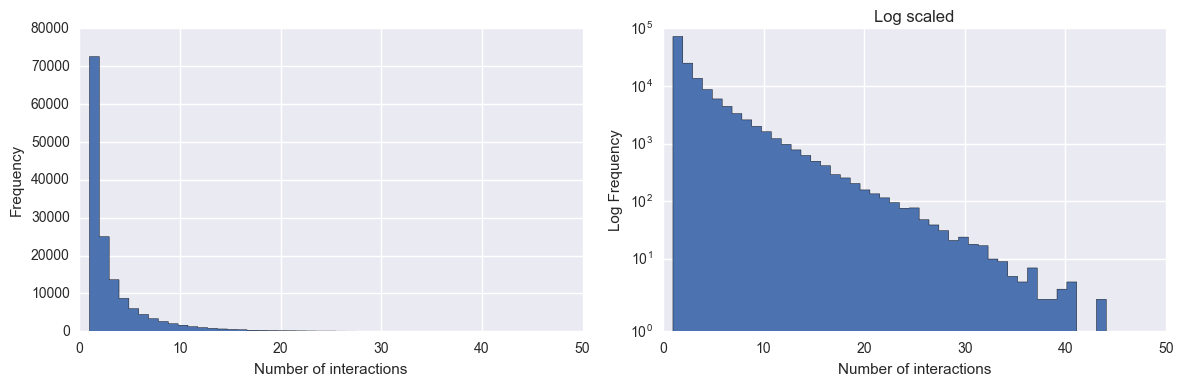

In [16]:
dfd=pd.read_csv('CrowdstormingDataJuly1st.csv',header=0)
# Pull out the number of games in each dyad and plot 
games = dfd.games

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

axes[0].hist(games,bins=max(games),histtype = 'stepfilled')
axes[0].set_xlabel('Number of interactions')
axes[0].set_ylabel('Frequency')

axes[1].hist(games,bins=max(games),histtype = 'stepfilled')
axes[1].set_yscale('symlog') # symetric log scale NOTE this breaks the nice plotting tools
axes[1].set_title("Log scaled")
axes[1].set_xlabel('Number of interactions')
axes[1].set_ylabel('Log Frequency')


fig.tight_layout()
# display_d3()

print('highest number of games in a single dyad = ', str(max(games)))

In [17]:
stalwarts = dfd[dfd.games>=40]
print('Players who meet the same ref 40+ times',stalwarts.player.unique())
print('Total interactions =', len(dfd))
clean_interactions = dfd[(dfd.redCards == 0)]

print('Number of red cards in the dataset =', len(dfd) - len(clean_interactions))
print('Number of interactions without a red card =', len(clean_interactions))
print('Proportion of interactions that are clean =', len(clean_interactions) / float(len(dfd)))
allRefs = dfd.refNum.value_counts()
print('Number of refs =', len(allRefs))
print('Number of dyads in the dataset =', sum(allRefs))

Players who meet the same ref 40+ times ['Bastian Schweinsteiger' 'Philipp Lahm' 'Paul Scholes' 'Michael Carrick'
 'Wayne Rooney' 'Mark Schwarzer' 'Ashley Cole' 'Frank Lampard'
 'James Milner' 'John Terry']
Total interactions = 146028
Number of red cards in the dataset = 1809
Number of interactions without a red card = 144219
Proportion of interactions that are clean = 0.987611964828663
Number of refs = 3147
Number of dyads in the dataset = 146028


(-3, 160)

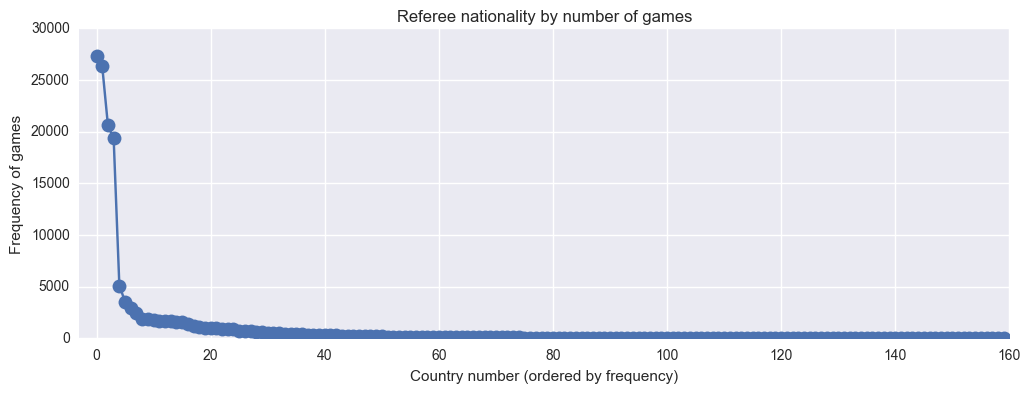

In [18]:
# Histogram of country frequency. 
fig, ax = plt.subplots(1,1,figsize=(12, 4))
x = dfd.Alpha_3.value_counts()
# print(x.values)
lines = ax.plot(x.values,marker='.',ms=20)
# 
y = x.index.tolist() 
# 
ax.set_title('Referee nationality by number of games')
ax.set_xlabel('Country number (ordered by frequency)')
ax.set_ylabel('Frequency of games')
ax.set_xlim([-3,160]) # a hack so we can see the first point most clearly

Total number of referees = 3147
Median number of dyads per referee = 8.0


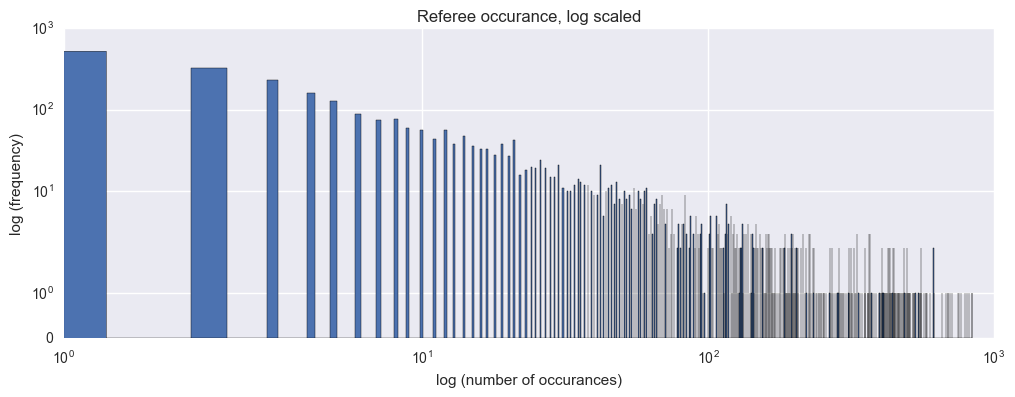

In [19]:
numRefs = len(dfd.refNum.value_counts())
print('Total number of referees =', numRefs)
print('Median number of dyads per referee =', np.median(dfd.refNum.value_counts()))

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 4))
axes.hist(dfd.refNum.value_counts().tolist(),bins=numRefs)
axes.set_xscale('symlog') # symetric log scale 
axes.set_yscale('symlog') 
axes.set_title("Referee occurance, log scaled")
axes.set_xlabel('log (number of occurances)')
axes.set_ylabel('log (frequency)')

We see that though most refs are only involved in a small number of dyads, many officiated over thousands. A median of 11 indicates that more than half of the refs officiated less than one game!

As the notebook says, If a ref officiated a full game in one of our selected premier leagues they would be in at least 22 dyads (2 teams of 11 players playing in each). So, in this case it's going to be less than the notebook.

# We clean the data by excluding interactions by refs who feature in fewer than 22 dyads
If you aren't in at least 22 dyads you didn't ref a game in one of our four defining leagues


In [20]:
goodRefs = allRefs[allRefs>21]
print('Number of refs featuring in at least 22 dyads =',len(goodRefs))
print('Number of dyads, excluding refs who officiate fewer than 22 games =', sum(goodRefs))
print('So we lose: ',(1-len(goodRefs)/numRefs)*100,'% of referees')
print('And we still remain',(sum(goodRefs)/sum(allRefs))*100,'% of dyads')

Number of refs featuring in at least 22 dyads = 998
Number of dyads, excluding refs who officiate fewer than 22 games = 133501
So we lose:  68.2872577057515 % of referees
And we still remain 91.4215082039 % of dyads


In [21]:
1 - len(dfd.dropna()) / len(dfd)

0.209350261593667

In [22]:
for i in dfd.columns:
    if(len(dfd[i])-len(dfd[i].dropna())>0):
        print(i,'has null values')

height has null values
weight has null values
position has null values
photoID has null values
rater1 has null values
rater2 has null values
Alpha_3 has null values
meanIAT has null values
nIAT has null values
seIAT has null values
meanExp has null values
nExp has null values
seExp has null values


In [23]:
len(dfd[dfd.rater1.isnull() & dfd.rater2.isnull()]) / len(dfd)

0.14659517352836443

In [24]:
#let's remove all NaN values from rater1,rater2
skin=dfd.dropna(how='all',subset=['rater1','rater2'])
skin.rater2.value_counts().sort_index()

skin['skin'] = ((skin.rater1 + skin.rater2) / 2)
skin = skin.drop('rater1', axis=1)
skin = skin.drop('rater2', axis=1)

/home/alvaro/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


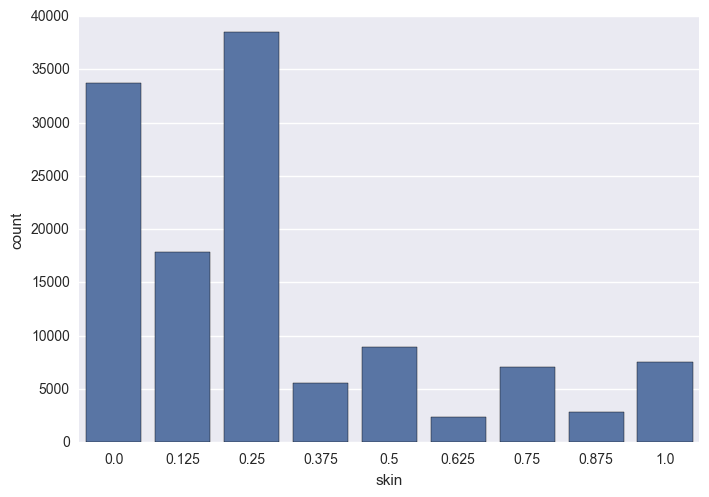

In [25]:
plot_color = sb.color_palette()[0]
sb.countplot(x='skin', data=skin, color=plot_color);

# pairs = [(skin['skin'], 'skin')]
# pairs.sort()
# sortedMeans, sortedTitle = zip(*pairs)

# pylab.figure(1)
# x = [0,0.2]
# pylab.xticks(x, sortedTitle, rotation='vertical')
# pylab.ylabel("count")
# pylab.bar(x, skin.skin.value_counts().sort_index(), align='center', alpha=0.125)
# pylab.axhline(avgpeso, color='k', linewidth=1, linestyle='dashed')

In [26]:
for i in skin.columns:
    if(i in list(skin.dtypes[skin.dtypes!='object'].index)):
        print(i,'column is numeric')
    else:
        print(i,'object type')
    if(len(skin[i])-len(skin[i].dropna())>0):
        print('\t',i,'has null values')
        

playerShort object type
player object type
club object type
leagueCountry object type
birthday object type
height column is numeric
	 height has null values
weight column is numeric
	 weight has null values
position object type
	 position has null values
games column is numeric
victories column is numeric
ties column is numeric
defeats column is numeric
goals column is numeric
yellowCards column is numeric
yellowReds column is numeric
redCards column is numeric
photoID object type
refNum column is numeric
refCountry column is numeric
Alpha_3 object type
	 Alpha_3 has null values
meanIAT column is numeric
	 meanIAT has null values
nIAT column is numeric
	 nIAT has null values
seIAT column is numeric
	 seIAT has null values
meanExp column is numeric
	 meanExp has null values
nExp column is numeric
	 nExp has null values
seExp column is numeric
	 seExp has null values
skin column is numeric


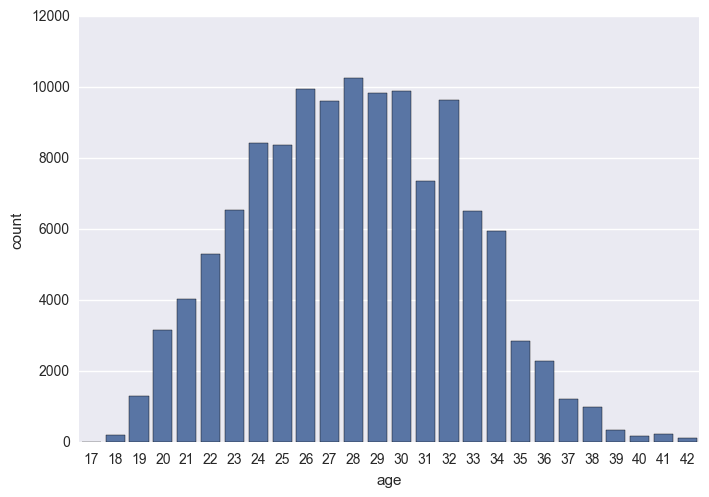

In [27]:
# footballers_df['birthday']=footballers_df['birthday'].apply(lambda x: 1+2012-int(x[6:]) if(int(x[3:4])<7) else 2012-int(x[6:]))
skin['age']=skin['birthday']
skin=skin.drop('birthday',axis=1)
skin['age']=skin['age'].apply(lambda x: 1+2012-int(x[6:]) if(int(x[3:4])<7) else 2012-int(x[6:]))
sb.countplot(x='age', data=skin, color=plot_color)


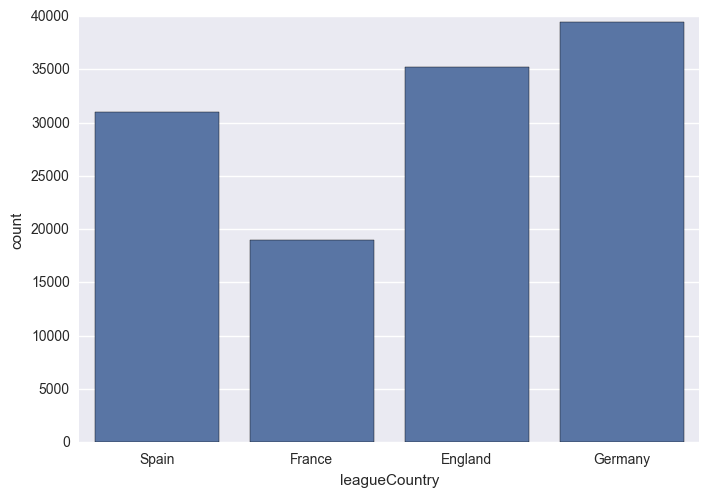

In [28]:
sb.countplot(x='leagueCountry', data=skin, color=plot_color)


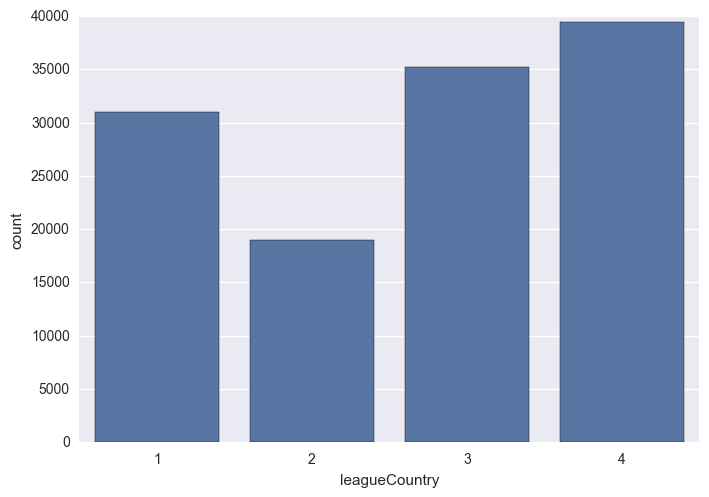

In [29]:
d = {'Spain':'1', 'France':'2', 'England':'3', 'Germany':'4'}
skin['leagueCountry']=skin['leagueCountry'].apply(lambda x:d[x])
sb.countplot(x='leagueCountry', data=skin, color=plot_color)

In [30]:
team={v:k for k,v in enumerate(skin.club.unique())}
skin['club']=skin['club'].apply(lambda x: int(team[x]))
# hist=sb.countplot(x='club', data=skin, color=plot_color)
# plt.setp(hist.get_xticklabels(), rotation=90)
# hist

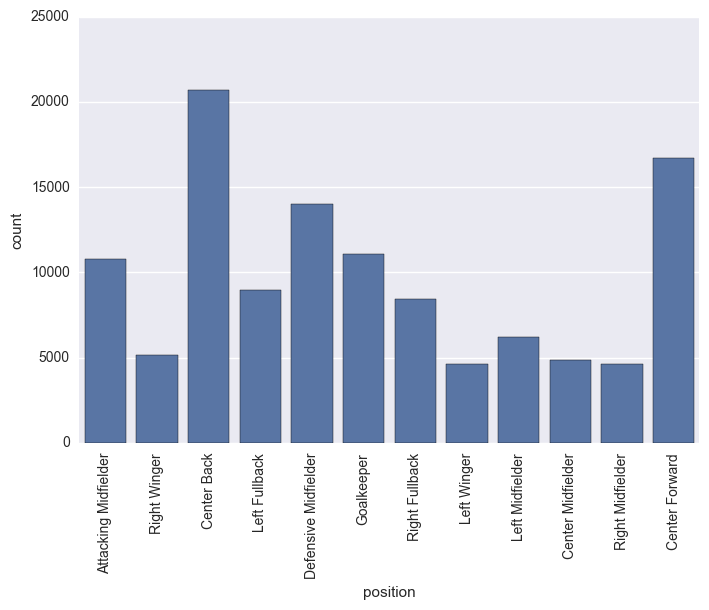

In [31]:
skin.position.fillna('Unknown')
hist=sb.countplot(x='position', data=skin, color=plot_color)
plt.setp(hist.get_xticklabels(), rotation=90)
hist


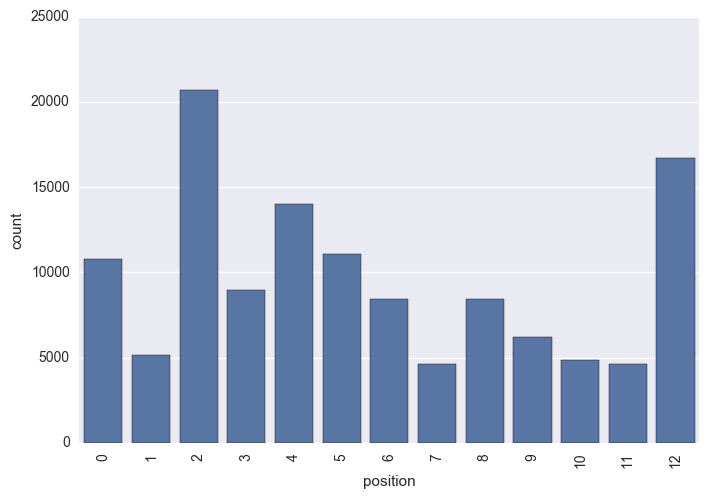

In [32]:
position={v:k for k,v in enumerate(skin.position.unique())}
skin['position']=skin['position'].apply(lambda x:position[x])

hist=sb.countplot(x='position', data=skin, color=plot_color)
plt.setp(hist.get_xticklabels(), rotation=90)
hist

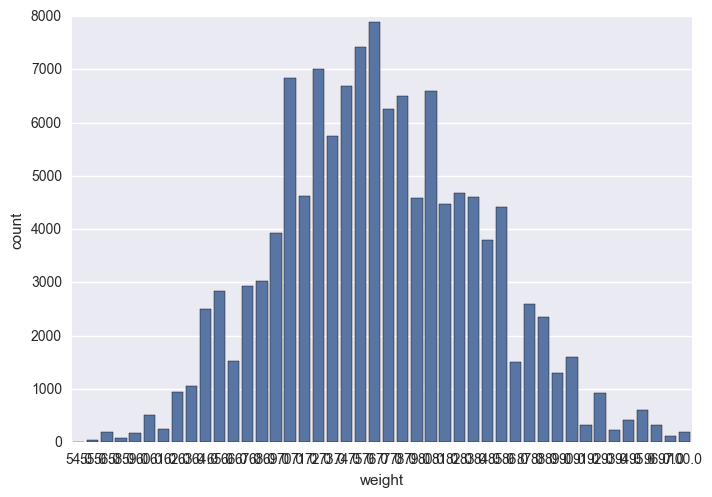

In [33]:
antesdeNorm=skin.height.value_counts().sort_index()
median_aux=skin['weight'].dropna().median()

skin.loc[skin.weight.isnull(),'weight']=median_aux
sb.countplot(x='weight', data=skin, color=plot_color)

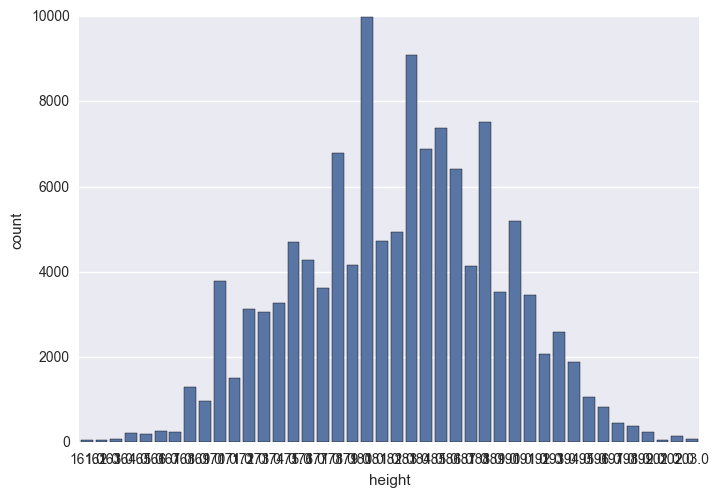

In [34]:
median_aux=skin['height'].dropna().median()
skin.loc[skin.height.isnull(),'height']=median_aux
sb.countplot(x='height', data=skin, color=plot_color)

# skin[skin.duplicated('playerShort')].sort(['playerShort'],ascending=[True])[140:]


In [35]:
toStandard=['weight','height','position','leagueCountry','skin']
skin[toStandard].head()

,weight,height,position,leagueCountry,skin
0,72.0,177.0,0,1,0.375
1,82.0,179.0,1,2,0.750
5,71.0,182.0,2,3,0.125
6,80.0,187.0,3,3,0.125
7,68.0,180.0,4,3,1.000


In [36]:
skin.sample()

,playerShort,player,club,leagueCountry,height,weight,position,games,victories,ties,...,refCountry,Alpha_3,meanIAT,nIAT,seIAT,meanExp,nExp,seExp,skin,age
133009,moussa-dembele,Moussa Dembélé,13,3,177.0,64.0,10,4,2,1,...,44,ENGL,0.32669,44791.0,0.00001,0.356446,46916.0,0.000037,0.5,26


In [38]:
from sklearn import preprocessing

# mean, mode and median doesn't match on height, weight, position and leagueCountry
# let's standarize them as suggests http://www.um.es/docencia/pguardio/documentos/Tec_resi.pdf
# must see http://stackoverflow.com/questions/39120942/difference-between-standardscaler-and-normalizer-in-sklearn-preprocessing
# StandardScaler() funciona para columnas asi que esta bien
def standardize_numeric_var(column):
    """Standardizes a numerical column."""
    proc = preprocessing.StandardScaler()
    proc.fit(column)
    return proc.transform(column)
toStandard=['weight','height','club','position','leagueCountry','skin']
from scipy import stats
# remove shortplayer and player to avoid bias and skin since we cannot use it, alpha3 because it's the same
# as refCountry, and photoID because we can't see them
skin_numeric=skin.drop(['player','playerShort','Alpha_3','photoID'],axis=1)
print('remaining nan values',len(skin_numeric)-len(skin_numeric.dropna()),'\nlets remove them')
skin_numeric=skin_numeric.dropna()
# skin_numeric=skin_numeric[(np.abs(stats.zscore(skin_numeric)) < 3).all(axis=1)]
# skin_numeric[np.abs(skin_numeric.skin-skin_numeric.skin.mean())<=(3*skin_numeric.skin.std())]
for column in toStandard:
#     skin_numeric[column]=skin_numeric[(np.abs(stats.zscore(skin_numeric)) < 3).toStandard(axis=1)]
    skin_numeric[column] = standardize_numeric_var(skin_numeric[column])
#skin_numeric.ix[:10,9:]
# sb.countplot(x='height', data=skin_numeric, color=plot_color)
#skin_numeric.height.value_counts().sort_index()

remaining nan values 153 
lets remove them


/home/alvaro/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:583: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/alvaro/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:646: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/alvaro/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:583: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if yo

In [39]:
skin_numeric[toStandard].head()

,weight,height,club,position,leagueCountry,skin
0,-0.609526,-0.753630,-1.581639,-1.436796,-1.433192,0.317661
1,0.785882,-0.459667,-1.540036,-1.177923,-0.573593,1.617787
5,-0.749067,-0.018723,-1.498433,-0.919050,0.286006,-0.549090
6,0.506800,0.716184,-1.456830,-0.660177,0.286006,-0.549090
7,-1.167689,-0.312686,-1.415227,-0.401304,0.286006,2.484538


In [59]:
# save the skin data to prove it right, (dtype must be |S6 see link below)
# http://stackoverflow.com/questions/34246336/python-randomforest-unknown-label-error
# skin_random=skin_numeric.iloc[np.random.permutation(len(skin_numeric))]
# skin_random80=skin_random.iloc[:int(len(skin_random)*0.6),:]
skin_random=skin_numeric.sample(int(len(skin_numeric)*0.8))
test_data20=skin_numeric[~skin_numeric.isin(skin_random)].dropna()
# test_data=test_data.drop(['skin'],axis=1)
# skin_random60.index=range(1,len(skin_random60)+1)
test_data = np.array(skin_random['skin'],dtype="|S6")
skin_random=skin_random.drop(['skin'],axis=1)
# test_data60
# print()skin_random60
test_data20=np.array(test_data20['skin'],dtype="|S6")

In [60]:
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import cross_validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

n_estim = [1, 5, 10, 50, 100, 200]
accuracies = []
for n in n_estim:
    forest = RandomForestClassifier(n_estimators=n)
    scores = cross_validation.cross_val_score(forest, skin_random, test_data, cv=20)
    accuracies.append(scores.mean())
    print('Finished forest with', str(n), 'trees.')

Finished forest with 1 trees.
Finished forest with 5 trees.
Finished forest with 10 trees.
Finished forest with 50 trees.
Finished forest with 100 trees.
Finished forest with 200 trees.


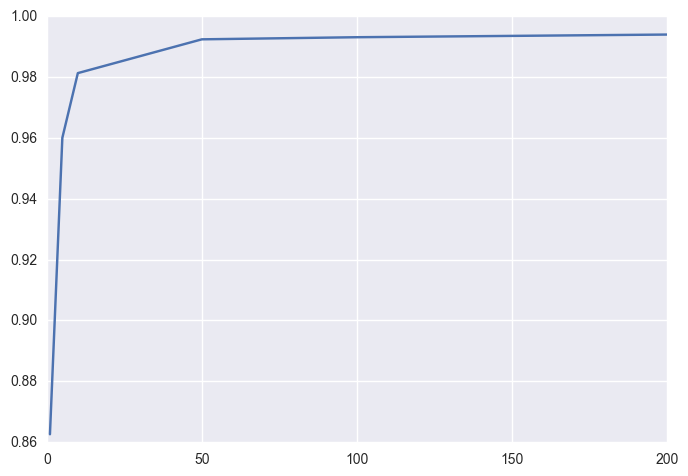

In [61]:
plt.plot(n_estim, accuracies)

Feature ranking:
1. weight (0.177419)
2. height (0.173727)
3. club (0.172107)
4. age (0.152577)
5. position (0.136557)
6. leagueCountry (0.034688)
7. refNum (0.021422)
8. games (0.014231)
9. meanExp (0.012819)
10. victories (0.011982)
11. refCountry (0.010718)
12. meanIAT (0.010163)
13. seIAT (0.009533)
14. defeats (0.009402)
15. nExp (0.009089)
16. nIAT (0.008763)
17. goals (0.008674)
18. seExp (0.008664)
19. ties (0.008106)
20. yellowCards (0.008008)
21. redCards (0.000684)
22. yellowReds (0.000667)


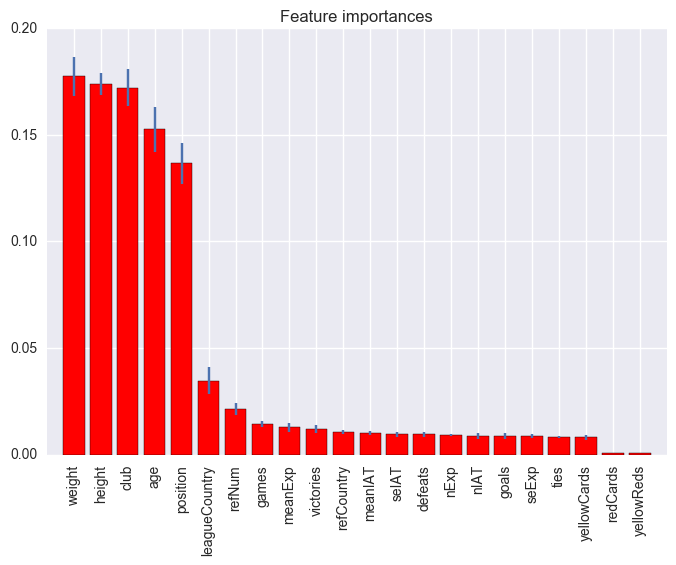

In [64]:
forest = RandomForestClassifier(n_estimators=5).fit(skin_random, test_data)
importances = forest.feature_importances_
importances_std = std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(skin_random.shape[1]):
    print("%d. %s (%f)" % (f + 1, skin_random.columns[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(skin_random.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(skin_random.shape[1]), skin_random.columns[indices], rotation=90)
plt.xlim([-1, skin_random.shape[1]])
plt.show()

-0.115715    7699
-0.982466    6776
-0.549090    3562
 0.751036    1813
 2.484538    1511
 1.617787    1395
 0.317661    1104
 2.051163     561
 1.184412     473
Name: skin, dtype: int64


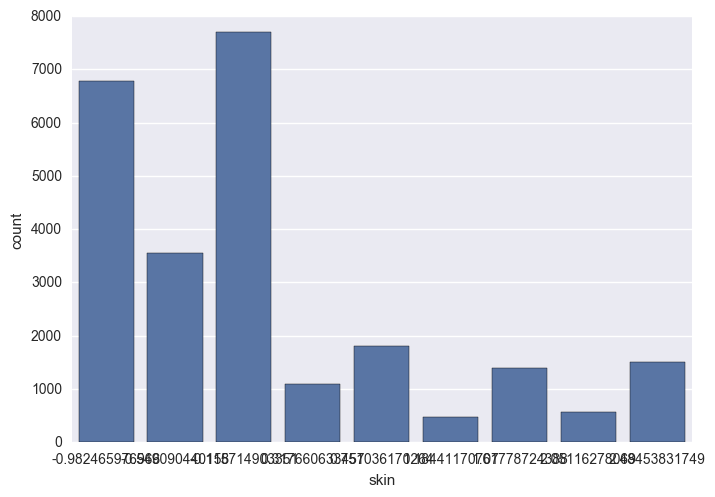

In [111]:
test_data20=skin_numeric[~skin_numeric.isin(skin_random)].dropna()
test_data=test_data20['skin']
test_data_aux=np.array(test_data20['skin'],dtype="|S6")
test_data20['skin']=test_data20.skin.astype('float')
sb.countplot(x='skin', data=test_data20, color=plot_color)
print(test_data20.skin.value_counts())
test_data20=test_data20.drop(['skin'],axis=1)

predictions = forest.predict(test_data20)

-0.1150    7962
-0.9820    6772
-0.5490    3552
 0.7510    1745
 2.4845    1446
 1.6177    1365
 0.3176    1075
 2.0511     534
 1.1844     443
Name: predictedskin, dtype: int64


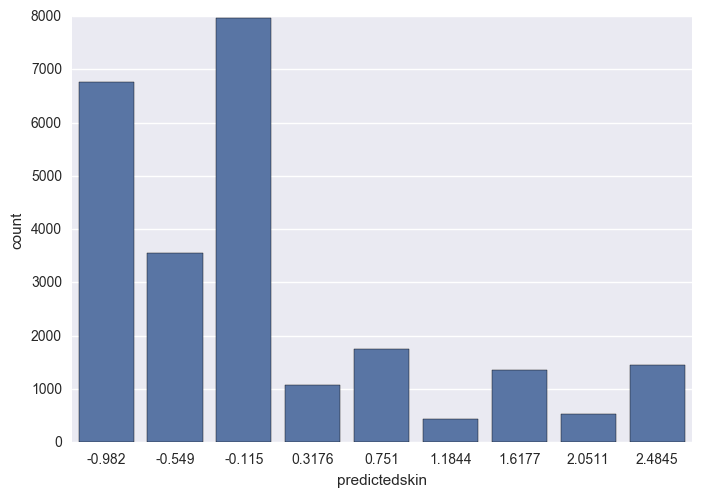

In [110]:
# test_data['predictedskin']=predictions.astype('float')
# test_data['predictedskin']=0
test_data20['predictedskin']=predictions.astype('float')
sb.countplot(x='predictedskin', data=test_data20, color=plot_color)
print(test_data20.predictedskin.value_counts())

In [65]:
# shuffle rows in dataframe
# normalize a distribution 
# http://stackoverflow.com/questions/26414913/normalize-columns-of-pandas-data-frame
x=skin.age.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
x_scaled
# ver http://sebastianraschka.com/Articles/2014_about_feature_scaling.html

/home/alvaro/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/home/alvaro/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:324: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/home/alvaro/anaconda3/lib/python3.5/site-packages/sklearn/preprocessing/data.py:359: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


array([ 0.52,  0.56,  0.68, ...,  0.2 ,  0.24,  0.72])

In [163]:
from sklearn.cluster import KMeans
import sklearn.metrics as sm
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
skin_k=skin
# cols=['yellowCards','yellowReds','redCards','refNum','meanIAT','meanExp']
cols=['meanIAT','meanExp']
skin_k=skin_k.loc[:,cols].dropna()
# skin_k=skin_k.drop(skin['yellowCards','yellowReds','redCards','refNum','meanIAT','meanEXP']
skin_target=skin['skin']
skin_k80=skin_k.sample(int(len(skin_k)*0.8))
skin_k20=skin_k[~skin_k.isin(skin_k80)].dropna()

# skin.columns
# skin_target.columns=['skin']
# K Means Cluster
model = KMeans(n_clusters=2,max_iter=500,init='k-means++',n_init=8)
model.fit(skin_k)
model.labels_
cls_labels=model.predict(skin_k20)
score=silhouette_score(skin_k20,cls_labels)
print('score',score)
# View the results
# Set the size of the plot
plt.figure(figsize=(14,7))
 
# Create a colormap
colormap = np.array(['red', 'lime', 'black','orange','blue','green'])
 
# Plot the Original Classifications
plt.subplot(1, 2, 1)
# ,skin_k.redCards,skin_k.refNum,skin_k.meanIAT,skin_k.meanExp
plt.scatter(skin_k.meanExp,skin_k.meanIAT, c=colormap[skin_target], s=40)
plt.title('yellowCards-yellowReds Results before classifying')
 
plt.subplot(1, 2, 2)
# ,skin_k.redCards,skin_k.refNum,skin_k.meanIAT,skin_k.meanExp
plt.scatter(skin_k.meanExp, skin_k.meanIAT, c=colormap[model.labels_], s=40)
plt.title('yellowCards-yellowReds Classification')    
    
    
# # Plot the Models Classifications
# plt.subplot(3, 2, 2)
# plt.scatter(skin_k.yellowCards, x.yellowReds,x.redCards,x.refNum.x.meanIAT,x.meanExp, c=colormap[model.labels_], s=40)
# plt.title('K Mean Classification')

# # Plot the Models Classifications
# plt.subplot(3, 2, 3)
# plt.scatter(x.yellowCards, x.yellowReds,x.redCards,x.refNum.x.meanIAT,x.meanExp, c=colormap[model.labels_], s=40)
# plt.title('K Mean Classification')
# # Plot the Models Classifications
# plt.subplot(3, 2, 4)
# plt.scatter(x.yellowCards, x.yellowReds,x.redCards,x.refNum.x.meanIAT,x.meanExp, c=colormap[model.labels_], s=40)
# plt.title('K Mean Classification')
# # Plot the Models Classifications
# plt.subplot(3, 2, 5)
# plt.scatter(x.yellowCards, x.yellowReds,x.redCards,x.refNum.x.meanIAT,x.meanExp, c=colormap[model.labels_], s=40)
# plt.title('K Mean Classification')
# # Plot the Models Classifications
# plt.subplot(3, 2, 6)
# plt.scatter(x.yellowCards, x.yellowReds,x.redCards,x.refNum.x.meanIAT,x.meanExp, c=colormap[model.labels_], s=40)
# plt.title('K Mean Classification')


MemoryError: 